In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "/Users/augustinkuntz/Downloads/county_daily.csv"
df = pd.read_csv(path)
for col in df.columns: 
    print(col)
df

Unnamed: 0
date
fips
county
state
cases
cases_avg
deaths
deaths_avg


,Unnamed: 0,date,fips,county,state,cases,cases_avg,deaths,deaths_avg
0,0,2020-01-21,53061,Snohomish,Washington,1,0.14,0,0.0
1,1,2020-01-22,53061,Snohomish,Washington,0,0.14,0,0.0
2,2,2020-01-23,53061,Snohomish,Washington,0,0.14,0,0.0
3,3,2020-01-24,53061,Snohomish,Washington,0,0.14,0,0.0
4,4,2020-01-24,17031,Cook,Illinois,1,0.14,0,0.0
...,...,...,...,...,...,...,...,...,...
2603925,2639588,2022-05-21,69110,Saipan,Northern Mariana Islands,0,0.00,0,0.0
2603926,2639589,2022-05-21,69100,Rota,Northern Mariana Islands,0,0.00,0,0.0
2603927,2639590,2022-05-21,78030,St. Thomas,Virgin Islands,0,43.86,0,0.0
2603928,2639591,2022-05-21,78020,St. John,Virgin Islands,0,4.00,0,0.0


In [3]:
df.loc[df['cases'] == 0, 'cases'] = 0.00001
df.loc[df['cases'] < 0, 'cases'] = 0.00001
df.loc[df['deaths'] < 0, 'deaths'] = 0.00001

In [4]:
df2 = df.groupby("fips").agg(list) # dataframe with fips as index and each columns contain list
print(df2.head(3))

                                             Unnamed: 0  \
fips                                                      
1001  [10834, 12369, 14032, 15816, 17704, 19681, 217...   
1003  [2307, 2735, 3211, 3757, 4397, 5163, 6079, 711...   
1005  [30817, 33233, 35684, 38183, 40741, 43328, 459...   
1007  [21758, 23919, 26146, 28450, 30816, 33232, 356...   
1009  [12367, 14030, 15814, 17702, 19679, 21757, 239...   

                                                   date  \
fips                                                      
1001  [2020-03-24, 2020-03-25, 2020-03-26, 2020-03-2...   
1003  [2020-03-14, 2020-03-15, 2020-03-16, 2020-03-1...   
1005  [2020-04-03, 2020-04-04, 2020-04-05, 2020-04-0...   
1007  [2020-03-30, 2020-03-31, 2020-04-01, 2020-04-0...   
1009  [2020-03-25, 2020-03-26, 2020-03-27, 2020-03-2...   

                                                 county  \
fips                                                      
1001  [Autauga, Autauga, Autauga, Autauga, Autauga, ..

In [6]:
FIPS = 1009  ###  code fips 

# Times series with number of cases 


In [7]:
s = df2['date'] 
x = s[FIPS] ### list of dates for the i-th county
cases_i = df2['cases']
y = cases_i[FIPS]

In [8]:
index = pd.date_range(start=min(x), end=max(x)) #start and end for the specific county
len(index)
data = pd.Series(y[-len(index):], index) 
index, data

(DatetimeIndex(['2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
                '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
                '2020-04-02', '2020-04-03',
                ...
                '2022-05-12', '2022-05-13', '2022-05-14', '2022-05-15',
                '2022-05-16', '2022-05-17', '2022-05-18', '2022-05-19',
                '2022-05-20', '2022-05-21'],
               dtype='datetime64[ns]', length=788, freq='D'),
 2020-03-25    0.00001
 2020-03-26    0.00001
 2020-03-27    3.00000
 2020-03-28    0.00001
 2020-03-29    0.00001
                ...   
 2022-05-17    4.00000
 2022-05-18    6.00000
 2022-05-19    6.00000
 2022-05-20    8.00000
 2022-05-21    0.00001
 Freq: D, Length: 788, dtype: float64)

Daily cases of COVID19 in fips 1001 from April 2020


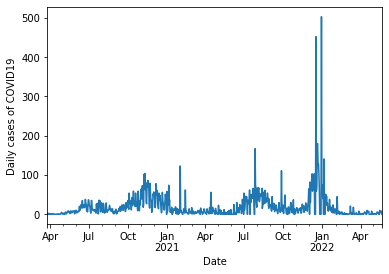

In [9]:
ax = data.plot() 
ax.set_xlabel("Date")
ax.set_ylabel("Daily cases of COVID19")
print("Daily cases of COVID19 from April 2020")

In [10]:
model = ExponentialSmoothing(data, trend="add", damped_trend=True, seasonal=None, seasonal_periods=None, initialization_method="estimated", use_boxcox=True,)
model_fit = model.fit(optimized=True,  remove_bias=True)


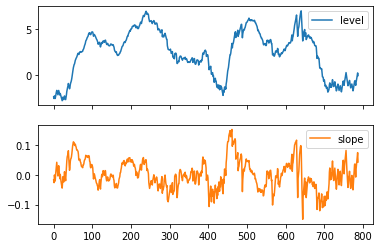

Figure 7.4: Level and slope components for Holt’s linear trend method and the additive damped trend method.


In [12]:
for fit in [model_fit]:
    pd.DataFrame(np.c_[fit.level, fit.trend]).rename(
        columns={0: "level", 1: "slope"}
    ).plot(subplots=True)
plt.show()
print(
    "Figure 7.4: Level and slope components for Holt’s linear trend method and the additive damped trend method."
)

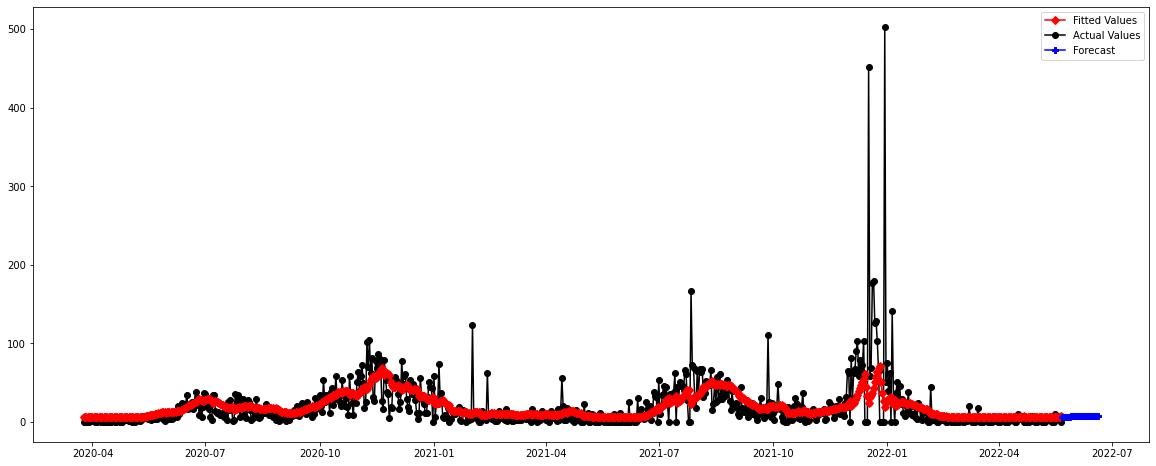

In [25]:
plt.figure(figsize=(20, 8))
(line2,) = plt.plot(data, marker="o", color="black")
plt.plot(model_fit.fittedvalues, marker="o", color="red")
(line1,) = plt.plot(model_fit.fittedvalues, marker="D", color="red")
(line3,) = plt.plot(model_fit.forecast(steps=30), marker='P', color="blue")

plt.legend([line1, line2, line3], ["Fitted Values", "Actual Values", "Forecast"])
plt.show()

# Time series with number of deaths

In [18]:
a = s[FIPS] ### list of dates for the i-th county
deaths_i = df2['deaths']
b =  deaths_i[FIPS]

In [19]:
index_D = pd.date_range(start=min(x), end=max(x)) #start and end for the specific county
len(index_D)
data2 = pd.Series(b[-len(index_D):], index_D) 
index_D, data2

(DatetimeIndex(['2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
                '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
                '2020-04-02', '2020-04-03',
                ...
                '2022-05-12', '2022-05-13', '2022-05-14', '2022-05-15',
                '2022-05-16', '2022-05-17', '2022-05-18', '2022-05-19',
                '2022-05-20', '2022-05-21'],
               dtype='datetime64[ns]', length=788, freq='D'),
 2020-03-25    0.0
 2020-03-26    0.0
 2020-03-27    0.0
 2020-03-28    0.0
 2020-03-29    0.0
              ... 
 2022-05-17    0.0
 2022-05-18    0.0
 2022-05-19    0.0
 2022-05-20    0.0
 2022-05-21    0.0
 Freq: D, Length: 788, dtype: float64)

Daily number of deaths


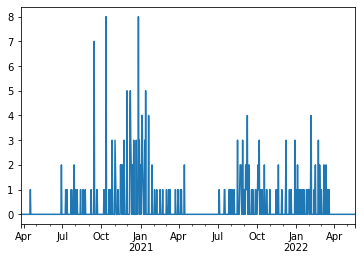

In [20]:
ay = data2.plot() 
ax.set_xlabel("Date")
ax.set_ylabel("Daily number of deaths")
print("Daily number of deaths") 

In [22]:
model2 = ExponentialSmoothing(data2, trend="add", damped_trend=True, seasonal=None, seasonal_periods=None, initialization_method="estimated", use_boxcox=False,)
model_fit2 = model2.fit(optimized=True,  remove_bias=False)

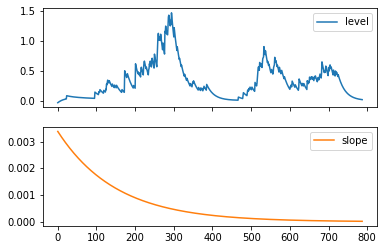

Figure 7.4: Level and slope components for Holt’s linear trend method and the additive damped trend method.


In [23]:
for fit in [model_fit2]:
    pd.DataFrame(np.c_[fit.level, fit.trend]).rename(
        columns={0: "level", 1: "slope"}
    ).plot(subplots=True)
plt.show()
print(
    "Figure 7.4: Level and slope components for Holt’s linear trend method and the additive damped trend method."
)

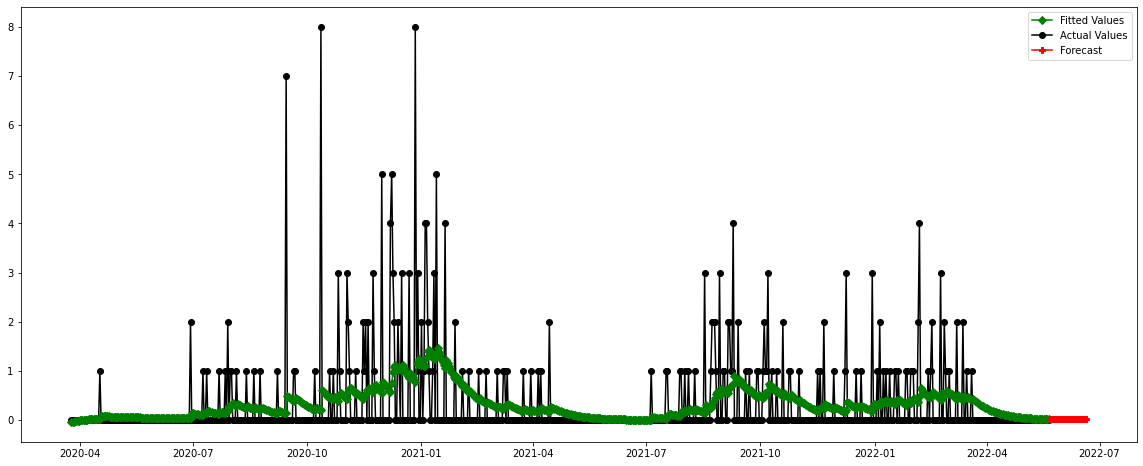

In [24]:
plt.figure(figsize=(20, 8))
(line2,) = plt.plot(data2, marker="o", color="black")
(line1,) = plt.plot(model_fit2.fittedvalues, marker="D", color="green")
(line3,) = plt.plot(model_fit2.forecast(steps=30), marker='P', color="red")

plt.legend([line1, line2], ["Fitted Values", "Actual Values"])


plt.legend([line1, line2, line3], ["Fitted Values", "Actual Values", "Forecast"])
